In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
X_df = pd.read_csv('data/data_train_input.csv', dtype='str')
y_df = pd.read_csv('data/data_train_output.csv')

X_df.fillna(0, inplace=True)

X = X_df.values
y = y_df.values

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 训练模型
model = LinearRegression()
model.fit(X_train, y_train)

# 预测值
y_pred = model.predict(X_test)

# 评价指标
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('R2 Score:', r2)

MAE: 0.006459042914599336
R2 Score: 0.12899710536975836


In [4]:
# 定义模型参数
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.1,
    'max_depth': 5,
    'min_child_weight': 1,
    'gamma': 0,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'n_estimators': 100
}

# 训练模型
model = xgb.XGBRegressor(**params)
model.fit(X_train, y_train)

# 预测值
y_pred = model.predict(X_test)

# 评价指标
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('R2 Score:', r2)

MAE: 0.0008722828209357372
R2 Score: 0.8516153516001174


MAE: 2.197044082276603e-05
R2 Score: 0.9985297238024224


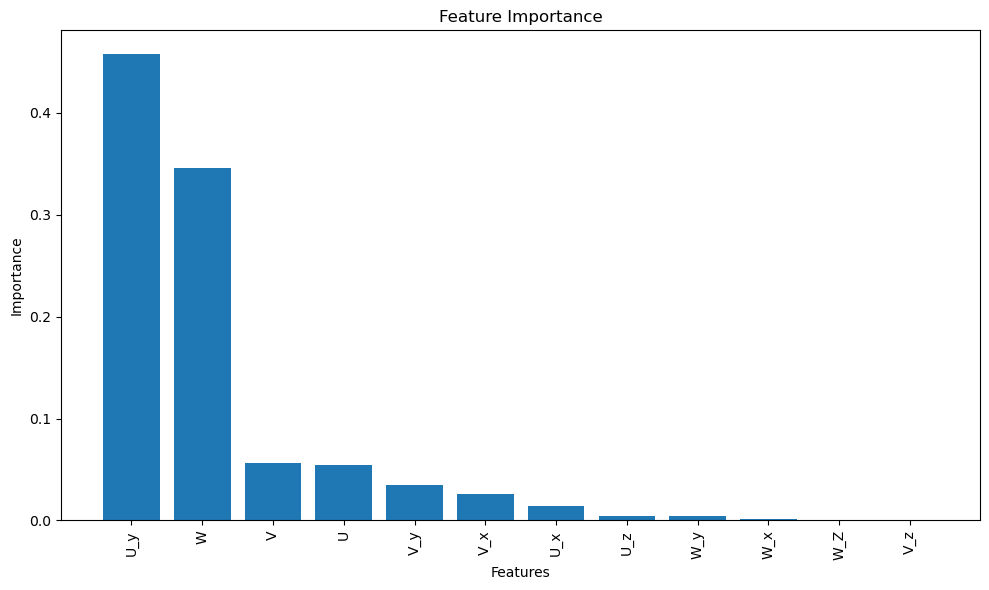

In [5]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 预测值
y_pred = rf_model.predict(X_test)

# 评价指标
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('R2 Score:', r2)

# 计算特征重要度
feature_importances = rf_model.feature_importances_

# 将特征重要度排序并可视化
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = [X_df.columns[i] for i in sorted_indices]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_importances)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()